In [1]:
import numpy as np
import pandas as pd
from random import random
# importing the csv files to respective dataframes
df = pd.read_csv("C:/MachineLearning/Digit_Recognition/train.csv")
df2 = pd.read_csv('C:/MachineLearning/Digit_Recognition/test_data.csv')
df3 =pd.read_csv('C:/MachineLearning/Digit_Recognition/test_labels.csv')

In [2]:
# function to assign the weights
def initialize_network(n_inputs, n_hidden, n_output):
#     between input and hidden layer
    hidden_layer = np.array([[random() * 0.01 for i in range(n_inputs + 1)] for i in range(n_hidden)])
#     between hidden layer and output 
    output_layer = np.array([[random() * 0.01 for i in range(n_hidden + 1)] for i in range(n_output)])
    return(hidden_layer, output_layer)

In [3]:
# initializing the weights , using 500 hidden neurons
weights = initialize_network(784,500,10)
hidden_weights = weights[0]
output_weights = weights[1]

In [4]:
#Transfer neuron activation
def sigmoid(out_hidden):
    return 1.0/(1.0 + np.exp(-out_hidden))

In [5]:
# forward_propagation
def forward_propagate(weights, weights1, input):
    out_hidden = np.dot(weights, input)
    out_inputs = sigmoid(out_hidden)
#   adding the input for bias in output layer
    out_inputs_b = np.concatenate((out_inputs,[[1]]),0)
    inputs_out = np.dot(weights1, out_inputs_b)  
    output = sigmoid(inputs_out)
    return (output, out_inputs)
        

In [6]:
# Calculate the derivative of output neuron
def deri_output(output, expected):
    transf1 = output * (1 - output)
    transf = transf1 * (expected - output)
    return transf

In [7]:
# Calculating error
def backward_propagate_error( weights1, output, out_hidden, expected):
    error = deri_output(output,expected)
    error_hid_int = weights1 *error
    error_hid_sum = np.sum(error_hid_int, 0)
    error_hid_sum_mat = np.array([error_hid_sum])    
    out_hidden_int = out_hidden * (1 - out_hidden)
    error_hidden = error_hid_sum_mat.T * out_hidden_int
    return (error, error_hidden)
    

In [8]:
# Updating the weights
def update_weight (weight, weight1, l_rate, out_error, hid_error, out_hidden1, input1):
    update_w_out_int = np.dot(out_hidden1,out_error.T)
    update_w_out_trans = update_w_out_int.T
    update_w_out_l = l_rate * update_w_out_trans
    update_w_out = weight1 + update_w_out_l
    update_w_hid_int = np.dot(input1,hid_error.T )
    update_w_hid_trans = update_w_hid_int.T
    update_w_hid_l = l_rate * update_w_hid_trans
    update_w_hid = weight + update_w_hid_l
    return (update_w_out, update_w_hid)
    

In [9]:
# array for expected outputs
expect_out = np.array(np.diag(np.ones(10)))

In [11]:
error = list()
# running the iterations for 10 times (10 epochs)
for j in range(15):
    error_sum = 0
#   iterating through each row 
    for keys,row in df.iterrows():
#     formatting the train data according to the weight matrix's dimension
        label = row.iloc[0]
        input1 = row.iloc[1:]
#     Scaling the training data
        input2 = np.array([input1])/255
        input3 = input2.T    
        input4 = np.concatenate((input3,[[1]]),0)
#     calling the forward propagation 
        forward_out = forward_propagate(hidden_weights, output_weights, input4)
#     assigning the ouput from output neurons
        out_hidden = forward_out[1]
#     assigning the output from hidden neurons
        output = forward_out[0]
#     assigning the ouput according to the label of the tain data
        expect_mat = expect_out[label] 
        expected_output = np.array([expect_mat]).T
#     calculating the total error for each row
        error_one_row = ((expected_output - output)**2)/2
#     adding the erorrs to find the total error of one epoch
        error_sum += error_one_row
#     formatting the weights(removing the bias weight for backward propagation)
        numcol = len(output_weights[0])
        output_weights1 = np.delete(output_weights, numcol - 1, 1)
#     calulating the errors after backward propagation
        errors_p = backward_propagate_error(output_weights1, output, out_hidden, expected_output)
#     assigning the output error and hidden error
        out_error = errors_p[0]
        hid_error = errors_p[1]
#     formatting the hidden layer ouputs(for bias)
        out_hidden1 =  np.concatenate((out_hidden,[[1]]),0)
#     learning rate
        l_rate = 0.5
#     updating the weights
        update_weight_one = update_weight(hidden_weights, output_weights, l_rate, out_error, hid_error, out_hidden1, input4)
# assigning the updated weights
        output_weights = update_weight_one[0]
        hidden_weights = update_weight_one[1]
# adding the total error of network after one network to the list
    error.append(error_sum)
# shuffling the training data
    df = df.sample(frac=1)
    print(j)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [12]:
error_all =list()
for key, layer in enumerate(error):
    err= np.sum(error[key])/40000
    error_all.append(err)

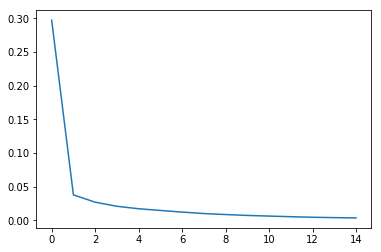

In [13]:
# plotting the errors of network during training
import matplotlib.pyplot as plt
plt.plot(error_all)
plt.show()

In [14]:
# passing the test data into the network
pos_max = list()
for keys,row in df2.iterrows():
    data = row.iloc[0:]
    data2 = np.array([data])/255
    data3 = data2.T    
    data4 = np.concatenate((data3,[[1]]),0)
    forward_out = forward_propagate(hidden_weights, output_weights, data4)
    output = forward_out[0]
# finding the position of the maximum output in the list
    pos_max_int = np.argmax(output)
    pos_max.append(pos_max_int)

In [15]:
# converting into matrix form
pos_max_mat = np.array([pos_max])
pos_max_mat.shape

(1, 2000)

In [16]:
# extracting the labels of label_test
label_test = np.array(df3).T
label_test.shape

(1, 2000)

In [17]:
# comparing the output with the label
comparison = np.equal(pos_max_mat, label_test)
np.sum(comparison)/2000

0.97299999999999998